In [36]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [37]:
# Read in data
df = pd.read_pickle('data/combined_data_cor.pkl')

In [38]:
# Create new feature 'percent_men' and drop 'Men' and 'Women' columns
df['percent_men'] = df['Men']/df['TotalPop']*100
df['percent_men'] = df['percent_men'].round(decimals=2)

df = df.drop(['Men', 'Women'], axis = 1)

In [39]:
df.head()

,CountyId,State,County,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,...,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State_abrv,num_shootings,shootings_per_cap,shootings_abv_avg,percent_men
0,1001,Alabama,"Autauga County, AL",55036,2.7,75.4,18.9,0.3,0.9,0.0,...,74.1,20.2,5.6,0.1,5.2,AL,0.0,0.000000,0,48.88
1,1003,Alabama,"Baldwin County, AL",203360,4.4,83.1,9.5,0.8,0.7,0.0,...,80.7,12.9,6.3,0.1,5.5,AL,1.0,0.000005,0,48.94
2,1005,Alabama,"Barbour County, AL",26201,4.2,45.7,47.8,0.2,0.6,0.0,...,74.1,19.1,6.5,0.3,12.4,AL,1.0,0.000038,1,53.34
3,1007,Alabama,"Bibb County, AL",22580,2.4,74.6,22.0,0.4,0.0,0.0,...,76.0,17.4,6.3,0.3,8.2,AL,0.0,0.000000,0,54.26
4,1009,Alabama,"Blount County, AL",57667,9.0,87.4,1.5,0.3,0.1,0.0,...,83.9,11.9,4.0,0.1,4.9,AL,1.0,0.000017,1,49.40


In [40]:
df.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment', 'State_abrv', 'num_shootings',
       'shootings_per_cap', 'shootings_abv_avg', 'percent_men'],
      dtype='object')

In [41]:
# Drop unneeded columns
df = df.drop(labels = ['CountyId', 'State', 'Income', 'IncomeErr', 
                       'IncomePerCapErr', 'State_abrv', 'num_shootings',
                       'shootings_per_cap'], axis = 1)

In [42]:
# Reorder columns
df = df[['County', 'TotalPop', 'percent_men', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 
         'Pacific', 'VotingAgeCitizen', 'IncomePerCap', 'Poverty', 'ChildPoverty', 
         'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 
         'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 
         'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 
         'Unemployment', 'had_shootings']]

KeyError: "['had_shootings'] not in index"

In [43]:
df.mean()

TotalPop             101984.086597
Hispanic                  9.121012
White                    76.772620
Black                     8.884177
Native                    1.812703
Asian                     1.319516
Pacific                   0.085482
VotingAgeCitizen      72086.308500
IncomePerCap          26031.744031
Poverty                  15.987202
ChildPoverty             22.105669
Professional             31.527794
Service                  18.123973
Office                   21.779911
Construction             12.639573
Production               15.930118
Drive                    79.539032
Carpool                   9.900000
Transit                   0.925820
Walk                      3.232283
OtherTransp               1.601847
WorkAtHome                4.802674
MeanCommute              23.352754
Employed              47832.366762
PrivateWork              75.070774
PublicWork               16.888571
SelfEmployed              7.759217
FamilyWork                0.282426
Unemployment        

In [44]:
# Drop NaNs
df.dropna(axis=0, how='any', inplace=True)

In [45]:
df['VotingAgeCitizen'] = df['VotingAgeCitizen']/df['TotalPop']
df['Employed'] = df['Employed']/df['TotalPop']

In [46]:
df.mean()

TotalPop             102016.538217
Hispanic                  9.122420
White                    76.790414
Black                     8.887006
Native                    1.813280
Asian                     1.310669
Pacific                   0.074777
VotingAgeCitizen          0.749398
IncomePerCap          26025.377070
Poverty                  15.988248
ChildPoverty             22.105669
Professional             31.530764
Service                  18.117611
Office                   21.780287
Construction             12.643599
Production               15.929140
Drive                    79.553917
Carpool                   9.900159
Transit                   0.926115
Walk                      3.220382
OtherTransp               1.598885
WorkAtHome                4.802197
MeanCommute              23.358089
Employed                  0.438190
PrivateWork              75.083567
PublicWork               16.874236
SelfEmployed              7.760669
FamilyWork                0.282516
Unemployment        

In [47]:
df.columns

Index(['County', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'VotingAgeCitizen', 'IncomePerCap', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'shootings_abv_avg',
       'percent_men'],
      dtype='object')

0    0.813057
1    0.186943
Name: shootings_abv_avg, dtype: float64


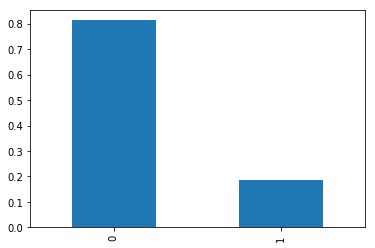

In [49]:
# Checking for class imbalance
target_pcts = df.shootings_abv_avg.value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

In [50]:
df = df.drop(labels = ['TotalPop'], axis = 1)
df.to_pickle('data/combined_data_cleaned_corrected.pkl')

In [40]:
# This cell takes forever to run
def plot_features(df, sample_size=500):
    
    sample = (df.drop(['County'],axis=1)
                .sample(1000, random_state=44)) 
    sns.pairplot(sample,hue='had_shootings', plot_kws=dict(alpha=.3, edgecolor='none'))

# plot_features(df)

In [45]:
# Split up data in train/test
X = df[['TotalPop', 'percent_men', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 
        'Pacific', 'VotingAgeCitizen', 'IncomePerCap', 'Poverty', 'ChildPoverty', 
        'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 
        'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 
        'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 
        'Unemployment']]

y = df['had_shootings']

# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2, random_state = 43)

In [56]:
# get baseline model:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1 = f1_score(lr.predict(X_te), y_te)
recall = recall_score(lr.predict(X_te), y_te)
print('f1 score: {} \nrecall score: {}'.format(f1, recall))

f1 score: 0.42990654205607476 
recall score: 0.7931034482758621


In [49]:
lr.coef_

array([[ 2.46749843e-05, -1.50083336e-02,  7.07398496e-03,
        -7.41579076e-03, -2.82307547e-02,  4.95119799e-03,
         1.36247307e-03,  2.45479218e-04,  1.77867309e-05,
        -4.28932383e-05, -2.76047558e-04, -8.99578898e-03,
        -1.54869933e-03, -2.27458742e-03,  7.62988342e-03,
        -1.30050061e-02, -7.38758635e-03,  7.54200190e-03,
        -2.64103042e-03, -2.52189194e-03, -1.21359151e-02,
        -1.45440614e-03, -5.32242842e-03, -6.60174482e-03,
        -5.85657953e-05,  1.06088120e-02, -1.01846561e-02,
        -1.65881139e-02, -4.61097167e-04,  3.13308658e-04]])

In [60]:
# Trees
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_tr, y_tr)
f1 = f1_score(randomforest.predict(X_te), y_te)
recall = recall_score(randomforest.predict(X_te), y_te)
print('f1 score: {} \nrecall score: {}'.format(f1, recall))

f1 score: 0.55 
recall score: 0.7857142857142857


In [61]:
# Maybe it would be better to streamline this:
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
    model.fit(xtrain, ytrain)
    f1 = f1_score(model.predict(xtest), ytest)
    recall = recall_score(model.predict(xtest), ytest)
    return (f1, recall)

def quick_test_afew_times(model, X, y, n=10):
    f1_list = []
    recall_list = []
    for test_num in range(n):
        f1, recall = quick_test(model, X, y)
        f1_list.append(f1)
        recall_list.append(recall)
    return (np.mean(f1_list), np.mean(recall_list))

In [65]:
# Logistic Regression
lr = LogisticRegression(solver='lbfgs')
quick_test_afew_times(lr, X, y)

(0.4797232556236485, 0.7681673027471243)

In [67]:
# Random Forests
randomforest = RandomForestClassifier(n_estimators=100)
quick_test_afew_times(randomforest, X, y)

(0.5215408150597777, 0.7031286522697736)

In [79]:
# Decision Trees
decisiontree = DecisionTreeClassifier(max_depth=3)
quick_test_afew_times(decisiontree, X, y)

(0.47139217868606514, 0.7053028097309346)

In [82]:
# Linear SVC
linearsvc = LinearSVC()
quick_test_afew_times(linearsvc, X, y)

(0.34085809517999854, 0.421271662202584)

In [83]:
# SVC
svc = SVC(gamma='scale')
quick_test_afew_times(svc, X, y)

(0.02702345004325992, 0.26172161172161174)